# Feature Engineering on Image Data

-	**scikit-image (skimage)** library for **image processing** and **feature extraction
-	**mahotas** framework for **computer vision** and **image processing**
-	**OpenCV** framework for **computer vision**

(168, 300, 3) (168, 300, 3)


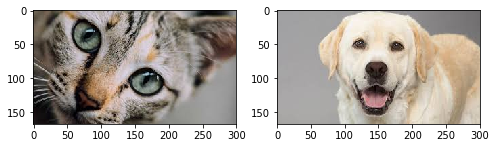

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
from skimage import io
%matplotlib inline

cat = io.imread('Data/cat.png')
dog = io.imread('Data/dog.png')

df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])
print(cat.shape, dog.shape)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cat)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dog)

In [39]:
# Take a look at the pixel representation i.e. color valur of rgb at each 
dog.shape

(168, 300, 3)

In [40]:
# Take a look at the pixel representation i.e. color value of rgb at row, col 
dog

array([[[160, 160, 162],
        [160, 160, 162],
        [160, 160, 162],
        ...,
        [113, 111, 112],
        [113, 111, 112],
        [112, 110, 111]],

       [[160, 160, 162],
        [160, 160, 162],
        [160, 160, 162],
        ...,
        [113, 111, 112],
        [113, 111, 112],
        [112, 110, 111]],

       [[160, 160, 162],
        [160, 160, 162],
        [160, 160, 162],
        ...,
        [113, 111, 112],
        [113, 111, 112],
        [112, 110, 111]],

       ...,

       [[165, 164, 162],
        [165, 164, 162],
        [165, 164, 162],
        ...,
        [212, 203, 186],
        [211, 202, 185],
        [210, 201, 184]],

       [[165, 164, 162],
        [165, 164, 162],
        [165, 164, 162],
        ...,
        [210, 201, 184],
        [210, 201, 184],
        [209, 200, 183]],

       [[164, 163, 161],
        [164, 163, 161],
        [164, 163, 161],
        ...,
        [209, 200, 183],
        [209, 200, 183],
        [209, 200, 183]]

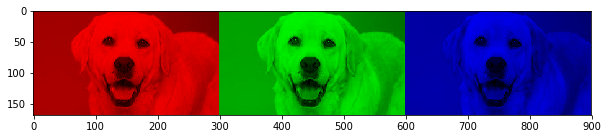

In [44]:
# Set G, B pixels = 0 to view red image
dog_r = dog.copy()
dog_g = dog.copy()
dog_b = dog.copy()

# Set G, B pixels = 0
dog_r[:, :, 1] = 0
dog_r[:, :, 2] = 0

# Set R, B pixels = 0
dog_g[:, :, 0] = dog_g[:, :, 2] = 0

# Set R, G pixels = 0
dog_b[:, :, 0] = dog_b[:, :, 1] = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

### Grayscale Image Pixels

In [56]:
from skimage.color import rgb2gray

# Convert rgb to gray using the formula
#    Y = 0.2125 x R + 0.7154 x G + 0.0721 x B
cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Cat Image Shape:', cgs.shape)
print('Dog Image Shape:', dgs.shape)

# Take a look at the 2D pixel map
print('\n2D image pixel map:\n', np.round(cgs, 2))

# Take a look at the Flattened pixel feature vector
print('\nFlattened pixel map:\n', (np.round(cgs.flatten(), 2)))

Cat Image Shape: (168, 300)
Dog Image Shape: (168, 300)

2D image pixel map:
 [[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]]

Flattened pixel map:
 [0.42 0.41 0.41 ... 0.51 0.51 0.51]


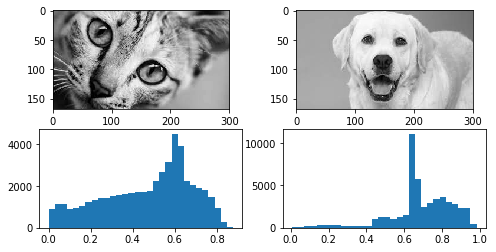

In [59]:
# We've just converted color representation to gray scale
# Let us take a look at gray scale picture
fig = plt.figure(figsize = (8, 4))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(cgs, cmap="gray")

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(dgs, cmap="gray")

ax3 = fig.add_subplot(2, 2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)

ax4 = fig.add_subplot(2, 2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

Observations:
- We can clearly see that the **dog image** has more concentration of the bin frequencies around **0.6 - 0.8** indicating **higher intensity** and the reason for that being that the **Labrador dog is white in color** and white has a high intensity value like we mentioned in the previous section. 
- The variables **c_freq, c_bins**, and **d_freq, d_bins** can be used to get the **numeric values** pertaining to the bins and **used as features**.

### Image Aggregation Statistics

### RGB Ranges

In [60]:
from scipy.stats import describe

cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T

cs = describe(cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)

cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


### Descriptive aggregations

In [61]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


Observations:
- **mean, median, and kurtosis** values for the various channels for the **dog** image are mostly **greater** than corresponding ones in the **cat** image.
- **Variance and skewness** are however **more** for the **cat** image.

### Edge Detection

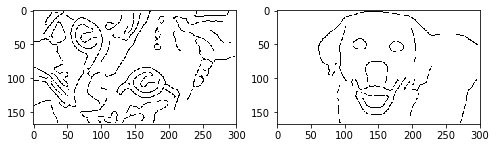

In [62]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cat_edges, cmap='binary')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dog_edges, cmap='binary')

### Object Detection

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


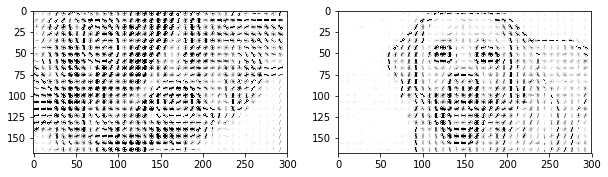

In [64]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                                          cells_per_block = (3, 3),
                                          visualise=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                                          cells_per_block = (3, 3),
                                          visualise=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cat_hogs, cmap='binary')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dog_hogs, cmap='binary')

### Localized Feature Extraction

In [68]:
# DID NOT INSTALL MAHOTAS AS PIP INSTALL MAHOTAS WAS FAILING WITH FOLLOWING ERROR MESSAGE
# error: Microsoft Visual C++ 14.0 is required. Get it with 
# "Microsoft Visual C++ Build Tools": https://visualstudio.microsoft.com/downloads/
from mahotas.features import surf

import mahotas as mh

cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dot)

cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

ModuleNotFoundError: No module named 'mahotas'